In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("/home/hemanth/Downloads/50_Startups.csv")

In [3]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
data['State'].value_counts()

California    17
New York      17
Florida       16
Name: State, dtype: int64

In [5]:
data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:
# Import label encoder 
from sklearn import preprocessing 
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
data['State']= label_encoder.fit_transform(data['State']) 
  
data['State'].unique() 


array([2, 0, 1])

In [7]:
data['State'].value_counts()

2    17
0    17
1    16
Name: State, dtype: int64

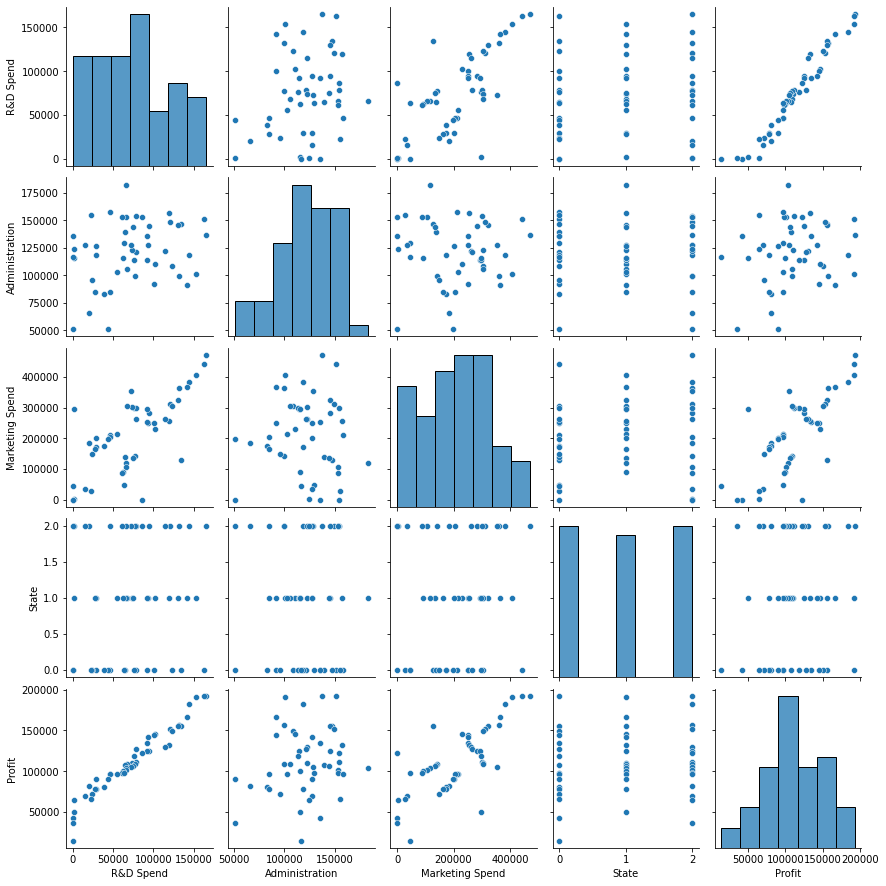

In [8]:
sns.pairplot(data)

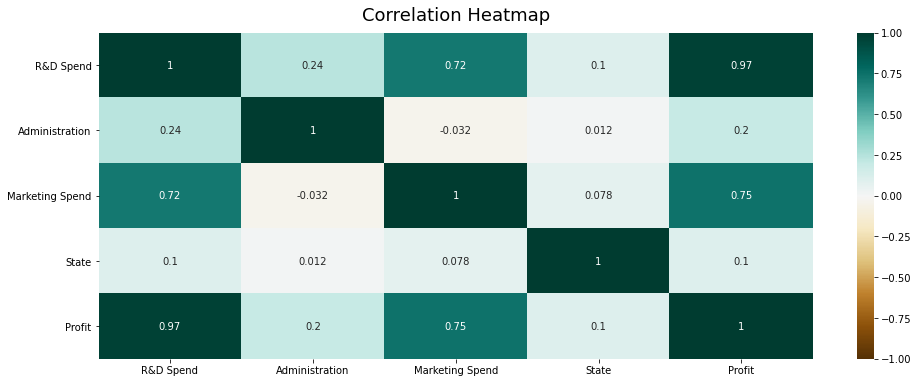

In [22]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

In [23]:
data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [24]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 4].values

In [25]:
X

array([[1.6534920e+05, 1.3689780e+05, 4.7178410e+05, 2.0000000e+00],
       [1.6259770e+05, 1.5137759e+05, 4.4389853e+05, 0.0000000e+00],
       [1.5344151e+05, 1.0114555e+05, 4.0793454e+05, 1.0000000e+00],
       [1.4437241e+05, 1.1867185e+05, 3.8319962e+05, 2.0000000e+00],
       [1.4210734e+05, 9.1391770e+04, 3.6616842e+05, 1.0000000e+00],
       [1.3187690e+05, 9.9814710e+04, 3.6286136e+05, 2.0000000e+00],
       [1.3461546e+05, 1.4719887e+05, 1.2771682e+05, 0.0000000e+00],
       [1.3029813e+05, 1.4553006e+05, 3.2387668e+05, 1.0000000e+00],
       [1.2054252e+05, 1.4871895e+05, 3.1161329e+05, 2.0000000e+00],
       [1.2333488e+05, 1.0867917e+05, 3.0498162e+05, 0.0000000e+00],
       [1.0191308e+05, 1.1059411e+05, 2.2916095e+05, 1.0000000e+00],
       [1.0067196e+05, 9.1790610e+04, 2.4974455e+05, 0.0000000e+00],
       [9.3863750e+04, 1.2732038e+05, 2.4983944e+05, 1.0000000e+00],
       [9.1992390e+04, 1.3549507e+05, 2.5266493e+05, 0.0000000e+00],
       [1.1994324e+05, 1.5654742e+

In [26]:
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [27]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [28]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [32]:
print(regressor.score(X_train,y_train))
print(regressor.score(X_test,y_test))

0.9500009880362248
0.9386861070938133


In [33]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)


In [34]:
y_pred


array([103959.40508021, 132398.73236694, 133529.03790148,  72958.28368314,
       179534.78737166, 115533.62584099,  67476.95847883,  98504.36199396,
       114789.16083781, 168972.21909945])

In [35]:
y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

In [36]:
pd.DataFrame({"Acutual_Data":y_test,"New_Data":y_pred})

,Acutual_Data,New_Data
0,103282.38,103959.405080
1,144259.40,132398.732367
2,146121.95,133529.037901
3,77798.83,72958.283683
4,191050.39,179534.787372
5,105008.31,115533.625841
6,81229.06,67476.958479
7,97483.56,98504.361994
8,110352.25,114789.160838
9,166187.94,168972.219099


In [38]:
from sklearn.metrics import r2_score
mu_lg_score=r2_score(y_test,y_pred)
print("Accuracy Score Of Multile Linear_Regression",mu_lg_score)

Accuracy Score Of Multile Linear_Regression 0.9386861070938133


In [39]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

7400.616305036962

In [40]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

78413822.17201345

In [41]:
from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(y_test,y_pred)

0.0068983862510346465

In [42]:
from sklearn.metrics import median_absolute_error
median_absolute_error(y_test,y_pred)

7682.931078922949

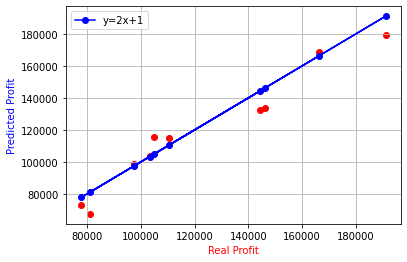

In [45]:
from matplotlib import pyplot as plt
plt.scatter(y_test, y_pred, color='red')
plt.xlabel('Real Profit', color='red')
plt.ylabel('Predicted Profit', color='blue')
plt.plot(y_test, y_test + 1, '-o' , linestyle='solid',label='y=2x+1', color='blue')
plt.legend(loc='upper left')
plt.grid()
plt.show()